Q1. Product Reviews
1a) Target (continuous)
Future sales volume (units) over a fixed horizon (e.g., next 30 days).

1b) Linear model with rating + judgment words
Let Score be the numeric rating. Let freq_good, freq_bad, freq_doesnt_work be normalized word frequencies (e.g., per 100 tokens).
Model:
  SalesNext30d = b0 + b1*Score + b2*freq_good + b3*freq_bad+ b4*freq_doesnt_work+ error

1c) Reducing features
- LASSO (L1) regularization to shrink unhelpful coefficients to zero.
- Dimensionality reduction (e.g., PCA on text features).
- Aggregate to a single sentiment score instead of multiple word counts.
1d) Mixed scales (1–5 vs 1–10)
Normalize ratings to a common scale before modeling (e.g., convert 1–10 to 1–5 by dividing by 2, or standardize to z-scores).
Optionally add an indicator feature for original scale (e.g., is_scale_10) to allow different intercepts/slopes if needed.
Without normalization, the Score coefficient is not comparable across scales.


Q2. Fruit dataset

2a) Categorical variables
type, color, size

2b) Total variables after one-hot coding
- If you one-hot encode all levels (no drop): 7 dummy vars + price = 8 total.
- If you use drop-first (to avoid multicollinearity with an intercept): 4 dummy vars + price = 5 total.
(Counting only the encoded features: 7 vs 4.)


Q3. Small linear regression

Given:
House 1: Size=1400, Beds=3, Price=245
House 2: Size=1600, Beds=3, Price=312
House 3: Size=1700, Beds=4, Price=279
(Price in $1000s)

Model: Price = β0 + β1·Size + β2·Bedrooms
(We’ll scale Size by 100 for easier arithmetic: Size100 = Size/100)

3a) Feature matrix A 
A = [
  [1, 14, 3],
  [1, 16, 3],
  [1, 17, 4]
]

3b) Target vector y
y = [245, 312, 279]^T

3c) Normal equation β̂ = (AᵀA)⁻¹Aᵀy gives
β̂ = [β0, β1, β2] = [-24.5, 33.5, -66.5]
(If you do NOT scale Size: β̂ = [-24.5, 0.335, -66.5])

3d) Predict for Size=1500 sqft (Size100=15), Bedrooms=3:
Pricê = -24.5 + 33.5·15 - 66.5·3 = 278.5  (in $1000s)
⇒ Predicted price ≈ $278,500


Q4. When is (AᵀA) invertible?

Claim. For A ∈ ℝ^{n×p}, (AᵀA) is invertible ⇔ the columns of A are linearly independent.

Proof.

(⇒) Suppose AᵀA is invertible. If A’s columns were dependent, there would exist x ≠ 0 with Ax = 0
(i.e., a nontrivial vector in the null space of A). Then
    AᵀA x = Aᵀ(Ax) = Aᵀ·0 = 0,
so x is in the null space of AᵀA. But an invertible matrix has only the zero vector in its null space.
Contradiction. Hence A’s columns are linearly independent.

(⇐) Suppose A’s columns are linearly independent. Then rank(A) = p (full column rank), so for any
x ≠ 0 we have Ax ≠ 0 and
    xᵀAᵀA x = ‖Ax‖² > 0.
Thus AᵀA is symmetric positive definite and therefore invertible.
(Equivalently, by the rank identity rank(AᵀA) = rank(A) = p; since AᵀA is p×p with rank p, it is invertible.)



5a) Feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

5b) Rows 10–15 for HouseAge, AveRooms, Population:
    HouseAge  AveRooms  Population
10      52.0  5.477612       910.0
11      52.0  4.772480      1504.0
12      52.0  5.322650      1098.0
13      52.0  4.000000       345.0
14      52.0  4.262903      1212.0
15      50.0  4.242424       697.0

5d) R^2 (train): 0.0023374510886858824
5d) R^2 (test): -0.03700899339889241
Intercept: 2.038064223107151
Slope for AveOccup: -0.009751795964041849


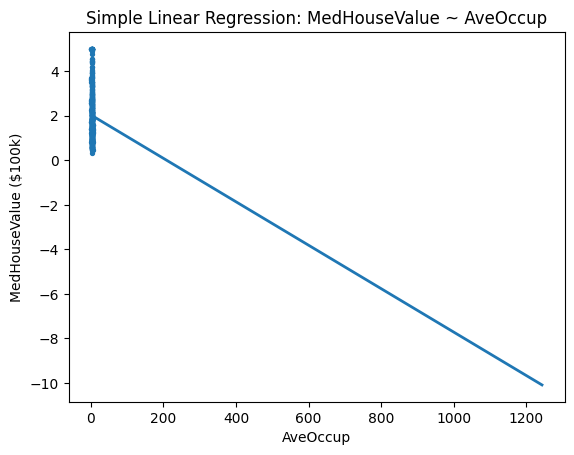

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression

california = fetch_california_housing(as_frame=True)
X_df = california.data 
y = california.target

print("5a) Feature names:", list(X_df.columns))

print("\n5b) Rows 10–15 for HouseAge, AveRooms, Population:")
print(X_df.loc[10:15, ['HouseAge','AveRooms','Population']])

# 5c) Simple linear regression: MEDV ~ AveOccup
X = X_df[['AveOccup']].values
n = len(y)
split = (2*n)//3
X_train, X_test = X[:split], X[split:]
y_train, y_test = y.values[:split], y.values[split:]

model = LinearRegression()
model.fit(X_train, y_train)

print("\n5d) R^2 (train):", model.score(X_train, y_train))
print("5d) R^2 (test):", model.score(X_test, y_test))
print("Intercept:", model.intercept_)
print("Slope for AveOccup:", model.coef_[0])

plt.figure()
sample = np.arange(0, n, 50)
plt.scatter(X_df['AveOccup'].iloc[sample], y.iloc[sample], s=8)
xs = np.linspace(X.min(), X.max(), 200).reshape(-1,1)
ys = model.predict(xs)
plt.plot(xs, ys, linewidth=2)
plt.xlabel("AveOccup")
plt.ylabel("MedHouseValue ($100k)")
plt.title("Simple Linear Regression: MedHouseValue ~ AveOccup")
plt.show()

5e) R²: fraction of target variance explained; expect low with one predictor. Big train–test gap ⇒ overfitting; both low ⇒ weak model.

Q6:
6a) b ∉ col(A)
6b) b ∈ col(A) and rank(A)=n
6c) b ∈ col(A) and rank(A)<n